#importing necessary libraries

In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
import xgboost as xgb
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV

#data loading

In [ ]:
data_id1 = '1lBE6MybWJYDStFDJbX__RZpSoOyFYxTe'

In [ ]:
data_id = '1OtxY15NnzMiV68uJluGz9B3dDon-eY0a'

In [ ]:
!gdown https://drive.google.com/uc?id={data_id1} -O lego_data_clean.csv

Downloading...
From: https://drive.google.com/uc?id=1lBE6MybWJYDStFDJbX__RZpSoOyFYxTe
To: /content/lego_data_clean.csv
100% 218k/218k [00:00<00:00, 39.4MB/s]


ParserError: Error tokenizing data. C error: Expected 1 fields in line 18, saw 2


# Pre-processing steps

In [ ]:
data = pd.read_csv("lego_data_clean.csv")
data = data.drop(['toy_name'], axis=1)
data[['llavero', 'original', 'adult']] = data[['llavero', 'original', 'adult']].astype(int)
cols = data.columns.tolist()

# Drops all null values present in data set
data.dropna(inplace=True)

#Label encoder
oe = OrdinalEncoder()
data['colection'] = oe.fit_transform(data[['colection']])

NameError: name 'pd' is not defined

In [ ]:
print(data.columns)


Index(['colection', 'price', 'discount', 'age', 'pieces', 'calification',
       'llavero', 'original', 'adult'],
      dtype='object')


In [ ]:
#Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
data = pd.DataFrame(data_scaled, columns=cols)

In [ ]:
y=data['price']
X = data.drop(['price'], axis=1)
data = pd.DataFrame(data, columns=cols)
print(data)
print(data.shape)

      colection     price  discount       age    pieces  calification  \
0     -1.602719  0.839342 -0.737095  1.971576  1.112707     -0.360537   
1     -1.602719 -0.164813 -0.737095  0.683576 -0.142525     -1.101274   
2     -1.602719 -0.365644 -0.737095  0.683576 -0.249389     -0.730906   
3     -1.602719 -0.245146 -0.737095  0.683576 -0.100602     -2.027195   
4     -1.602719  0.638511 -0.737095  1.971576  0.579213     -2.397563   
...         ...       ...       ...       ...       ...           ...   
1031   1.033760 -0.084481 -0.737095 -0.175090  0.090930      0.750568   
1032   1.033760 -0.666891 -0.737095 -0.175090 -0.437632      0.750568   
1033   1.033760 -0.666891  0.676643 -0.389757 -0.525589      0.195015   
1034   1.033760 -0.658858 -0.737095 -0.389757 -0.512437      0.565384   
1035   1.033760 -0.686974  0.676643 -0.604423 -0.563402      0.750568   

       llavero  original     adult  
0    -0.202993  0.840687  2.116951  
1    -0.202993  0.840687  2.116951  
2    -0.2029

# Exploratory Data Analysis

<Figure size 640x480 with 0 Axes>

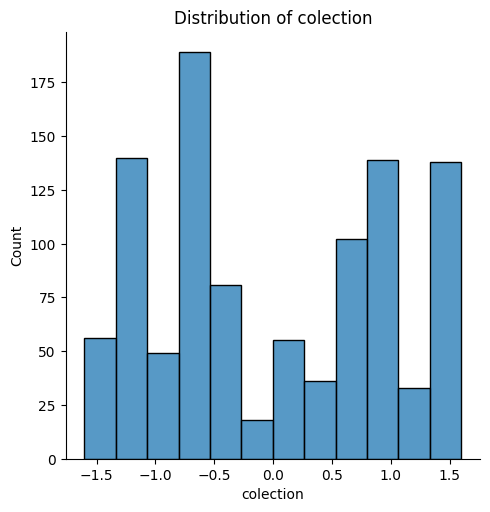

<Figure size 640x480 with 0 Axes>

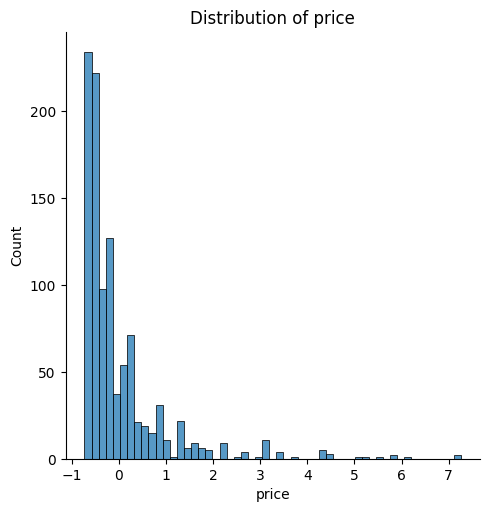

<Figure size 640x480 with 0 Axes>

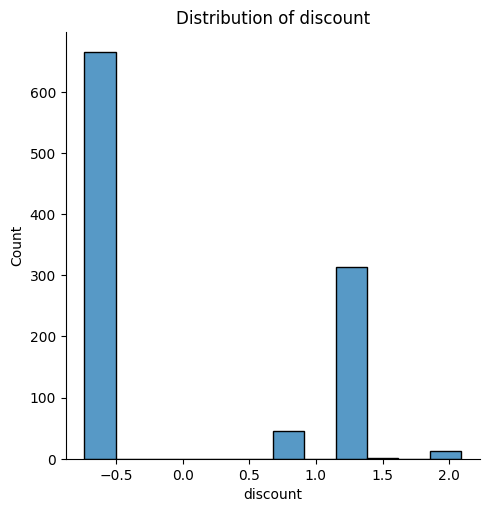

<Figure size 640x480 with 0 Axes>

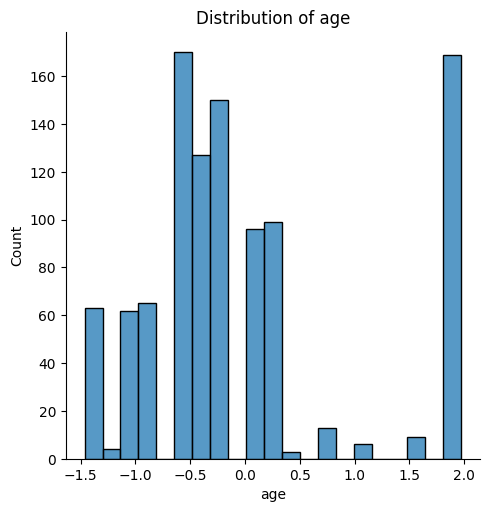

<Figure size 640x480 with 0 Axes>

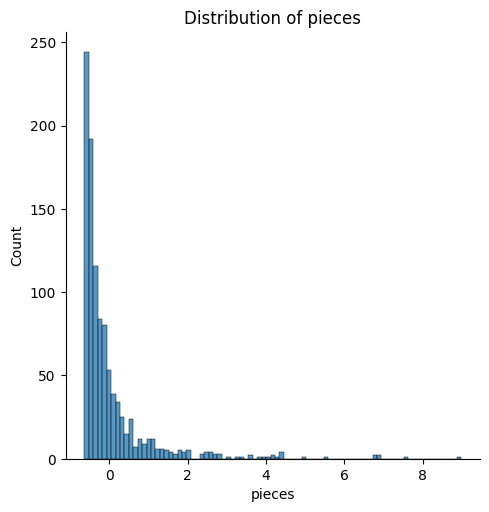

<Figure size 640x480 with 0 Axes>

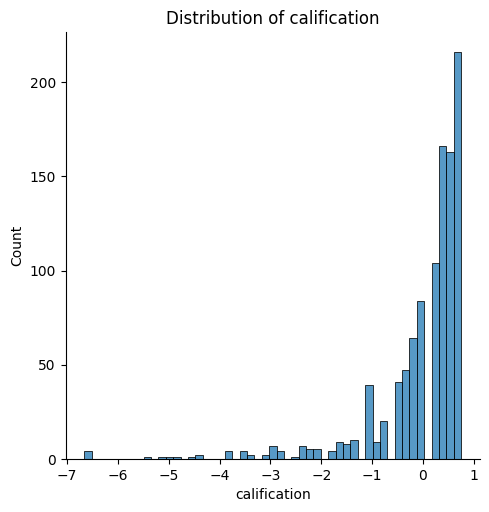

<Figure size 640x480 with 0 Axes>

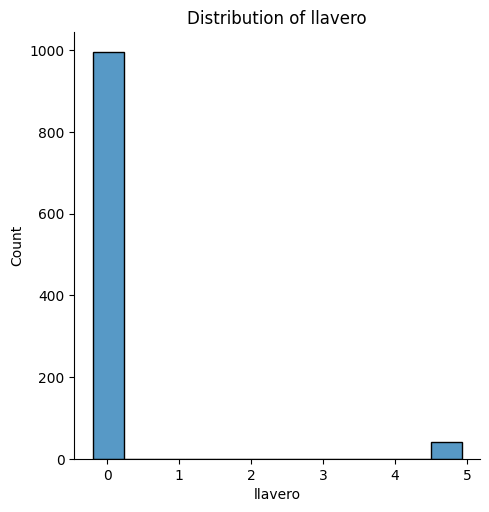

<Figure size 640x480 with 0 Axes>

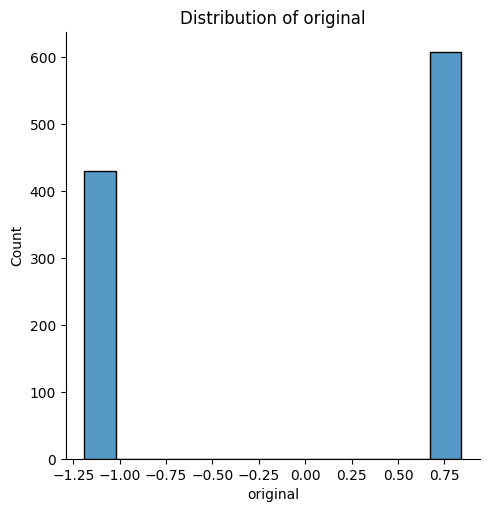

<Figure size 640x480 with 0 Axes>

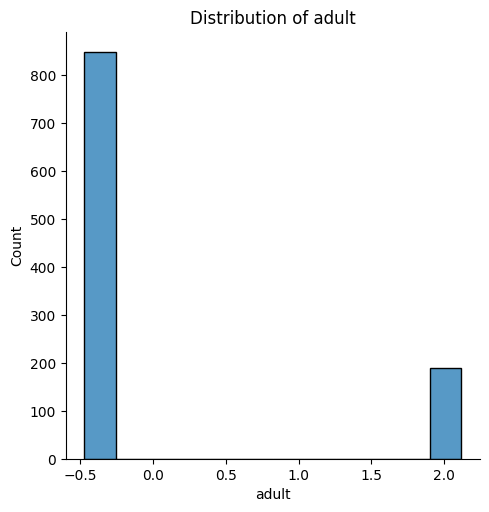

In [ ]:
# Distribution plots of each feature in X

import seaborn as sns

for col in data.columns:
  plt.figure()
  sns.displot(data[col])
  plt.title(f'Distribution of {col}')
  plt.show()

<Figure size 640x480 with 0 Axes>

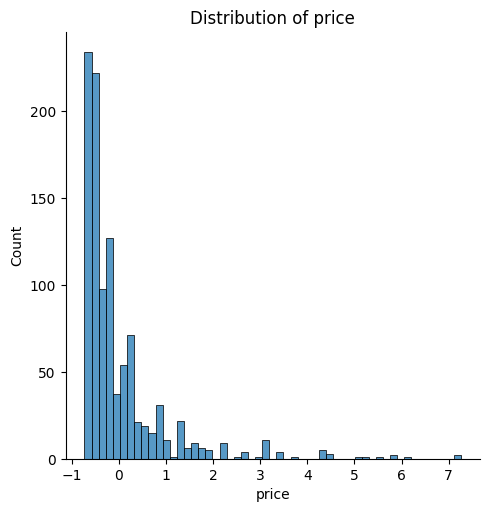

In [ ]:
#Target variable distribution for y

plt.figure()
sns.displot(y)
plt.title('Distribution of price')
plt.show()

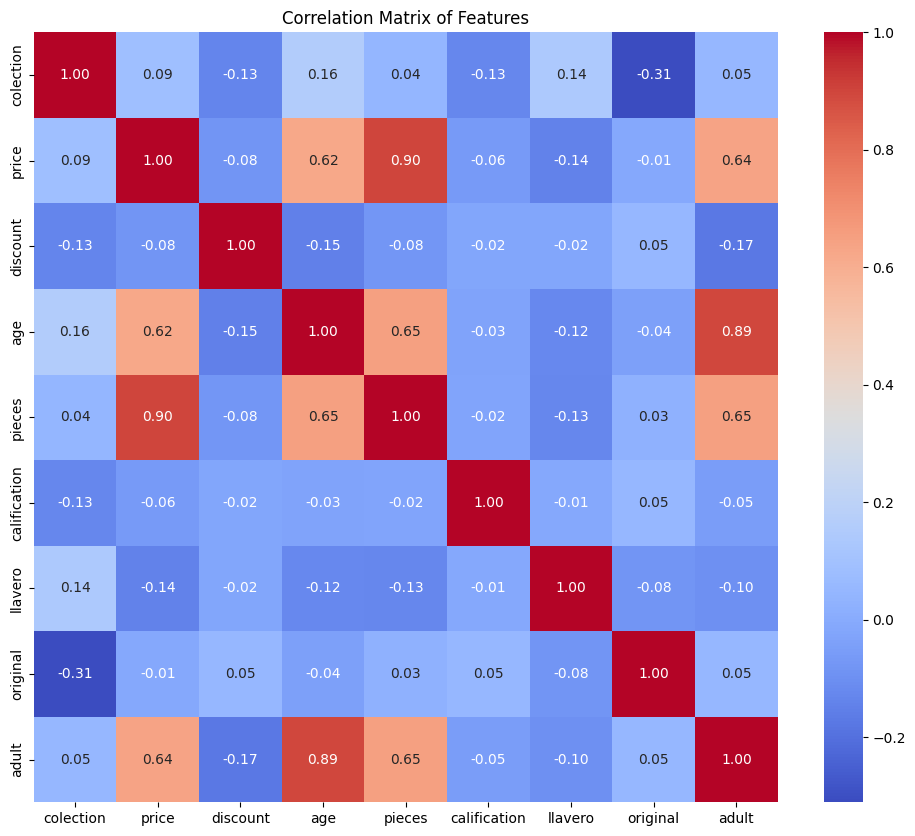

In [ ]:
# Correlation matrix of features
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

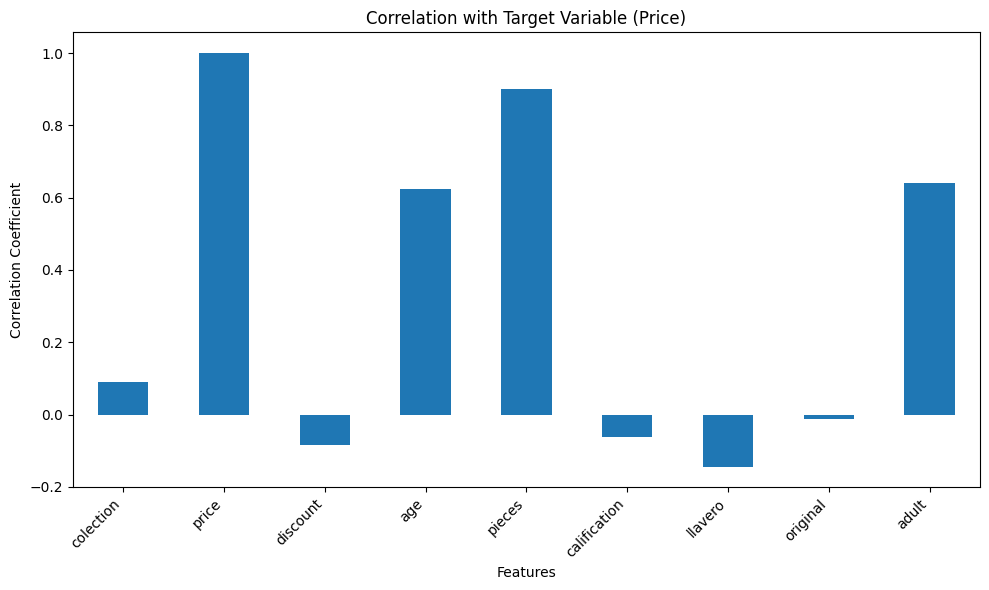

price           1.000000
pieces          0.899095
adult           0.641587
age             0.622506
colection       0.088607
original       -0.011350
calification   -0.062572
discount       -0.083284
llavero        -0.143985
dtype: float64


In [ ]:
# Correlation of features with the target variable

# Correlation with target variable
correlation_with_target = data.corrwith(y)
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlation with Target Variable (Price)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(correlation_with_target.sort_values(ascending=False))

Explained variance by each component: [0.31824227 0.18043706 0.12783996 0.11467314 0.11268998 0.08188149
 0.05221589 0.01202022]


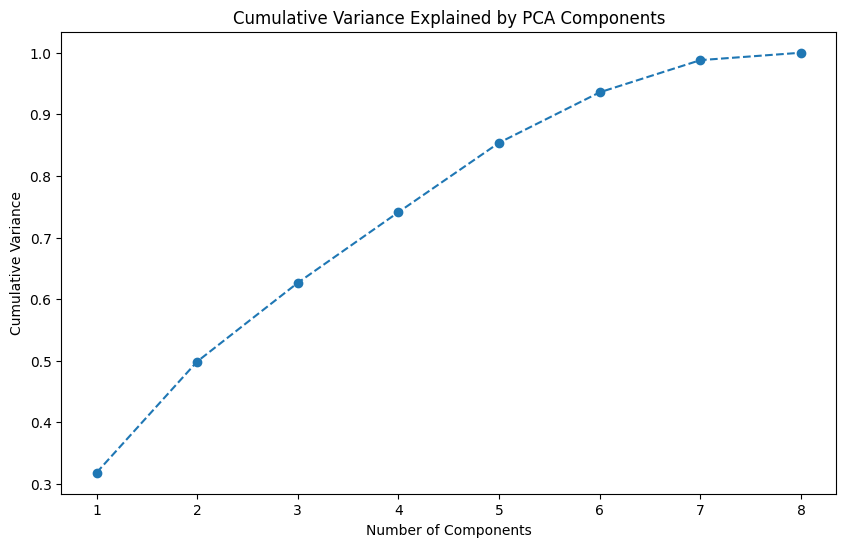

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance_ratio}")

cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

#random forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regression

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.0531
R-Squared (R²): 0.9339


#svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm regression

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X_train_scaled, y_train_scaled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (negative MSE): {best_score:.4f}")

best_model = grid_search.best_estimator_
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
Best Score (negative MSE): -0.1218
Mean Squared Error (MSE): 0.0907
R-Squared (R²): 0.8871


#linear regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.1295
R-Squared (R²): 0.8388


#ridge regression & lasso regression

linear regression performed well compared to ridge and lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge()
lasso = Lasso()

param_grid = {'alpha': [0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
ridge_pred = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f"Ridge Regression - Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression - MSE: {ridge_mse:.4f}")
print(f"Ridge Regression - R²: {ridge_r2:.4f}")

lasso_best = lasso_grid.best_estimator_
lasso_pred = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f"Lasso Regression - Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression - MSE: {lasso_mse:.4f}")
print(f"Lasso Regression - R²: {lasso_r2:.4f}")

Ridge Regression - Best Alpha: 10
Ridge Regression - MSE: 0.1327
Ridge Regression - R²: 0.8348
Lasso Regression - Best Alpha: 0.1
Lasso Regression - MSE: 0.1461
Lasso Regression - R²: 0.8182


#neural networks

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5792
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2619
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2147
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1954
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1406
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1056
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1481
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1810
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1839
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1384  
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1685
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1290
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1707
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1058
Epoch 15/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0885 
Epoch 16/100


#xgboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror',
                         eval_metric='rmse',
                         eta=0.1,
                         max_depth=6,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         n_estimators=1000)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.0548
R-Squared (R²): 0.9318


#gradient boosting

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

gbr_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

gbr_predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, gbr_predictions)
r2 = r2_score(y_test, gbr_predictions)

print(f"Best Parameters: {best_params}")
print(f"Gradient Boosting - Mean Squared Error (MSE): {mse:.4f}")
print(f"Gradient Boosting - R-Squared (R²): {r2:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting - Mean Squared Error (MSE): 0.0544
Gradient Boosting - R-Squared (R²): 0.9323


#ensemble methods

bagging

ensemble models (rf,gb)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest - MSE:", mean_squared_error(y_test, rf_predictions))
print("Random Forest - R^2:", r2_score(y_test, rf_predictions))

# 2. Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_predictions = gbr_model.predict(X_test)
print("Gradient Boosting - MSE:", mean_squared_error(y_test, gbr_predictions))
print("Gradient Boosting - R^2:", r2_score(y_test, gbr_predictions))

# 3. Voting Regressor (Combining multiple models)
linear_model = LinearRegression()
svr_model = SVR(kernel='rbf', C=100)

voting_regressor = VotingRegressor(estimators=[
    ('lr', linear_model),
    ('rf', rf_model),
    ('svr', svr_model)
])

voting_regressor.fit(X_train, y_train)
voting_predictions = voting_regressor.predict(X_test)
print("Voting Regressor - MSE:", mean_squared_error(y_test, voting_predictions))
print("Voting Regressor - R^2:", r2_score(y_test, voting_predictions))


Random Forest - MSE: 0.05313595210435974
Random Forest - R^2: 0.9338671853487106
Gradient Boosting - MSE: 0.053468863722395094
Gradient Boosting - R^2: 0.9334528447476886
Voting Regressor - MSE: 0.07487984579871267
Voting Regressor - R^2: 0.9068048135545295


ensemble models(lr, svr, nn, lg, rf, gb)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()

# 2. Support Vector Regressor
svr_model = SVR(kernel='rbf', C=100)

# 3. Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# 4. Logistic Regression (used as regressor with probability outputs)
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_regressor = lambda X: logistic_model.fit(X, y_train).predict_proba(X)[:, 1]

# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 6. Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models individually (required for VotingRegressor)
linear_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Create Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('lr', linear_model),
    ('svr', svr_model),
    ('nn', nn_model),
    ('rf', rf_model),
    ('gbr', gbr_model)
])

# Train Voting Regressor
voting_regressor.fit(X_train, y_train)

# Predictions
y_pred = voting_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.0686
R-Squared (R²): 0.9146


ensemble methods with more number of models performed well in the comparision

boosting

In [ ]:
stacked_model = StackingRegressor(estimators=[
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('abr', AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
], final_estimator=LinearRegression())

stacked_model.fit(X_train, y_train)

y_pred = stacked_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Boosting with Stacked Regressor - MSE: {mse:.4f}")
print(f"Boosting with Stacked Regressor - R²: {r2:.4f}")

Boosting with Stacked Regressor - MSE: 0.0538
Boosting with Stacked Regressor - R²: 0.9331


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgb = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

voting_model = VotingRegressor(estimators=[
    ('xgb', xgb),
    ('lgb', lgb),
    ('abr', AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

print("Advanced Boosting Ensemble - MSE:", mean_squared_error(y_test, y_pred))
print("Advanced Boosting Ensemble - R²:", r2_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 828, number of used features: 8
[LightGBM] [Info] Start training from score -0.002783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i